In [1]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [2]:
from importlib import reload # Reload models so that changes in the scripts are loaded
from scripts import data_load_clean_transform, change_point_analysis, brent_oil, oil_price_analysis
reload(change_point_analysis)
reload(data_load_clean_transform)
reload(brent_oil)
reload(oil_price_analysis)

<module 'scripts.oil_price_analysis' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-10\\scripts\\oil_price_analysis.py'>

In [3]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner  # import data loader and data clearner classes
from scripts.change_point_analysis import SalesChangePointAnalysis
from scripts.brent_oil import BrentOilAnalysis, DataAligner
from scripts.oil_price_analysis import OilPriceAnalysis

In [9]:
#Load CSV File
file_path = '../week 10 data/Data/BrentOilPrices.csv'
load_data = DataLoader(file_path)
data = load_data.load_csv()

2025-02-25 10:37:55,300 - INFO - Data successfully loaded from ../week 10 data/Data/BrentOilPrices.csv
2025-02-25 10:37:55,302 - INFO - DataFrame Shape: (9011, 2)


In [242]:
# see information about loaded data
cleaner = DataCleaner(data)
cleaner.check_missing_values()

2025-02-25 09:45:01,418 - INFO - Checking for missing values in the DataFrame.
2025-02-25 09:45:01,420 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,object
1,Price,0,0.0,float64


In [243]:
cleaner.transform_datetime('Date')

2025-02-25 09:45:04,494 - INFO - Transforming datetime column 'Date' without timezone conversion.


c:\ML and DS Files\Kifiya AI\Kaim-week-10\scripts\data_load_clean_transform.py:100: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])


2025-02-25 09:45:06,944 - INFO - Datetime transformation for column 'Date' completed.


In [244]:
# Nstantiante the class and run the analysis
analysis = BrentOilAnalysis(data)

2025-02-25 09:45:10,775 - INFO - Data initialized and sorted.


In [8]:
#Check Stationarity
is_stationary = analysis.check_stationarity()
print(f"Is Data Stationary? {is_stationary}")


2025-02-24 10:32:21,724 - INFO - ADF Statistic: -1.9938560113924677, p-value: 0.28927350489340287
Is Data Stationary? False


In [9]:
# Markov-Switching ARIMA 
ms_summary = analysis.fit_markov_switching(k_regimes=2)
print(ms_summary)

2025-02-24 10:32:21,733 - INFO - Fitting Markov Switching model with 2 regimes.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Mon, 24 Feb 2025   AIC                          70575.934
Time:                        10:32:30   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

In [10]:
# train LSTM Model
lstm_model = analysis.fit_lstm(epochs=50, batch_size=32)

2025-02-24 10:32:30,206 - INFO - Training LSTM model.
Epoch 1/50


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0174
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 3.3312e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 3.3138e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 2.7382e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.4243e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 1.9957e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 1.6404e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 1.5421e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 1.1962e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 1.3284e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.1220e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 1.1288e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 1.1459e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 1.0586e-04
Ep

2025-02-24 10:39:24,440 - INFO - Forecasting next 60 days using LSTM.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


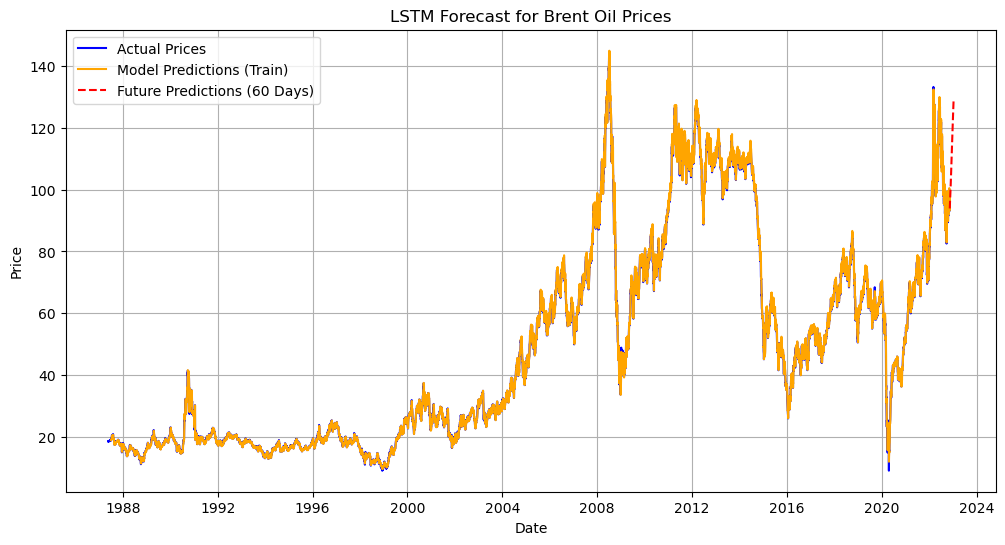

2025-02-24 10:39:43,959 - INFO - LSTM forecast plotted successfully.


In [11]:
future_predictions = analysis.forecast_lstm(future_days=60)

#### import new inflation csv of ethiopian inflation rate from world bank

In [10]:
file_path = '../week 10 data/Inflation rate data/Ethipian Inflatio rate.csv'
load_data = DataLoader(file_path)
data_e_i = load_data.load_csv()

2025-02-25 10:38:02,499 - INFO - Data successfully loaded from ../week 10 data/Inflation rate data/Ethipian Inflatio rate.csv
2025-02-25 10:38:02,501 - INFO - DataFrame Shape: (58, 2)


In [11]:
e_i_cleaner = DataCleaner(data_e_i)
e_i_cleaner.check_missing_values()

2025-02-25 10:38:04,575 - INFO - Checking for missing values in the DataFrame.
2025-02-25 10:38:04,581 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,int64
1,Inflation_%,0,0.0,float64


In [12]:
# Merge the two datasets    
aligner = DataAligner(data, data_e_i)
aligned_data = aligner.align_data()

c:\ML and DS Files\Kifiya AI\Kaim-week-10\scripts\brent_oil.py:170: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df1[self.date_col] = pd.to_datetime(self.df1[self.date_col], errors='coerce')


In [13]:
al_cleaner = DataCleaner(aligned_data)
al_cleaner.check_missing_values()

2025-02-25 10:38:13,918 - INFO - Checking for missing values in the DataFrame.
2025-02-25 10:38:13,921 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Price,22,37.931034,float64
1,Year,0,0.000000,int32
2,Inflation_%,0,0.000000,float64


In [14]:
# remove null values
al_cleaner.remove_nulls_from_columns(columns=['Price'])

2025-02-25 10:38:17,065 - INFO - Removing rows with null values in columns: ['Price'].
2025-02-25 10:38:17,073 - INFO - Rows with null values in columns ['Price'] removed successfully.


In [15]:
aligned_data.head()

,Price,Year,Inflation_%
21,18.30,1987,-2.428672
22,15.85,1988,7.080715
23,16.40,1989,7.817301
24,15.88,1990,5.152481
25,18.13,1991,35.722598


In [16]:
al_cleaner.check_missing_values()

2025-02-25 10:38:24,254 - INFO - Checking for missing values in the DataFrame.
2025-02-25 10:38:24,258 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Price,0,0.0,float64
1,Year,0,0.0,int32
2,Inflation_%,0,0.0,float64


In [17]:
# instantiate object
analysis = OilPriceAnalysis(aligned_data)

2025-02-25 10:38:31,647 - INFO - Performing Exploratory Data Analysis.
            Price         Year  Inflation_%
count   36.000000    36.000000    36.000000
mean    47.624444  2004.500000    11.310993
std     33.634789    10.535654    11.829380
min     14.550000  1987.000000    -8.484249
25%     18.257500  1995.750000     4.750127
50%     37.170000  2004.500000     8.316454
75%     75.257500  2013.250000    14.327185
max    122.900000  2022.000000    44.356686


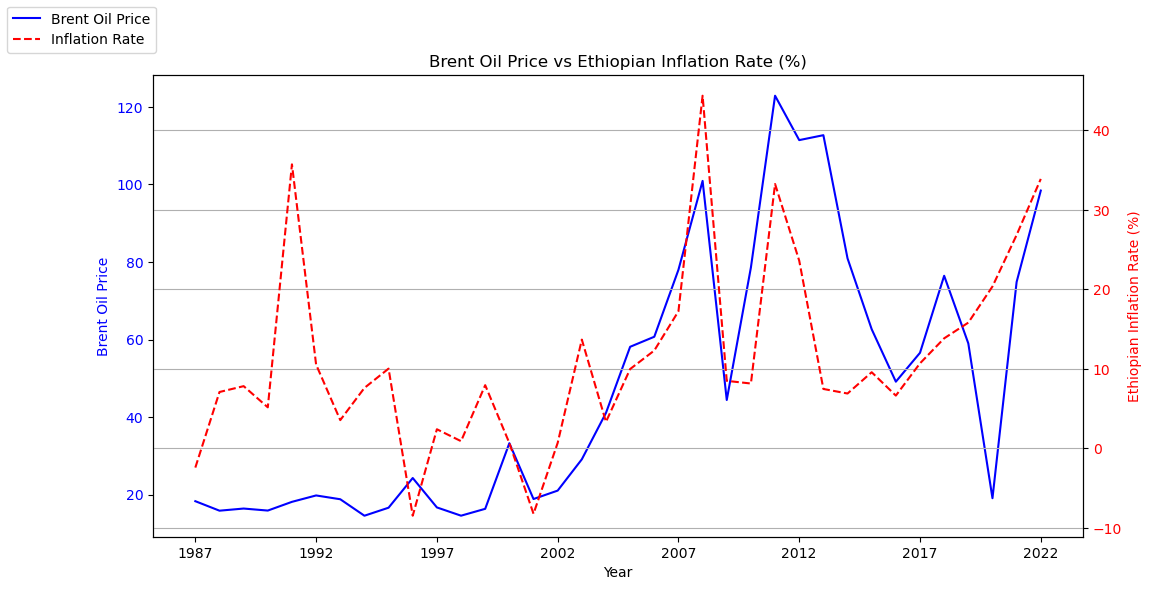

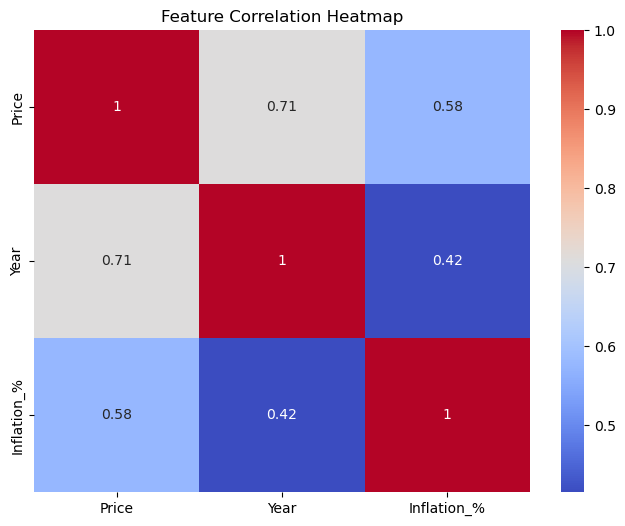

2025-02-25 10:38:33,055 - INFO - EDA completed.


In [18]:
analysis.exploratory_data_analysis()

In [19]:
# prepare data
X_train, X_test, y_price_train, y_price_test, y_inflation_train, y_inflation_test = analysis.prepare_data()

2025-02-25 10:38:42,503 - INFO - Preparing data for training.


In [20]:
# Train models
analysis.train_models(X_train, y_price_train)

2025-02-25 10:38:46,609 - INFO - Training models using MLflow.


2025/02/25 10:39:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/25 10:39:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2025-02-25 10:39:20,598 - INFO - Model training completed.


In [21]:
# Train LSTM
analysis.train_lstm(X_train, y_price_train, y_inflation_train)

2025-02-25 10:39:39,677 - INFO - Training LSTM model using MLflow.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/02/25 10:39:58 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/25 10:40:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2025-02-25 10:40:21,310 - INFO - LSTM model training completed.


In [23]:
# Evaluate Models
analysis.evaluate_models(X_test, y_price_test, y_inflation_test)

2025-02-25 10:41:29,494 - INFO - Evaluating models.
2025-02-25 10:41:29,510 - INFO - Decision Tree Model - MAE: 12.11, MSE: 214.82, R2: 0.82
2025-02-25 10:41:29,535 - INFO - Random Forest Model - MAE: 15.32, MSE: 411.96, R2: 0.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2025-02-25 10:41:29,737 - INFO - LSTM Model - MAE: 34.94, MSE: 1696.85, R2: -0.42


2025-02-25 10:41:32,082 - INFO - Forecasting for next 4 years.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


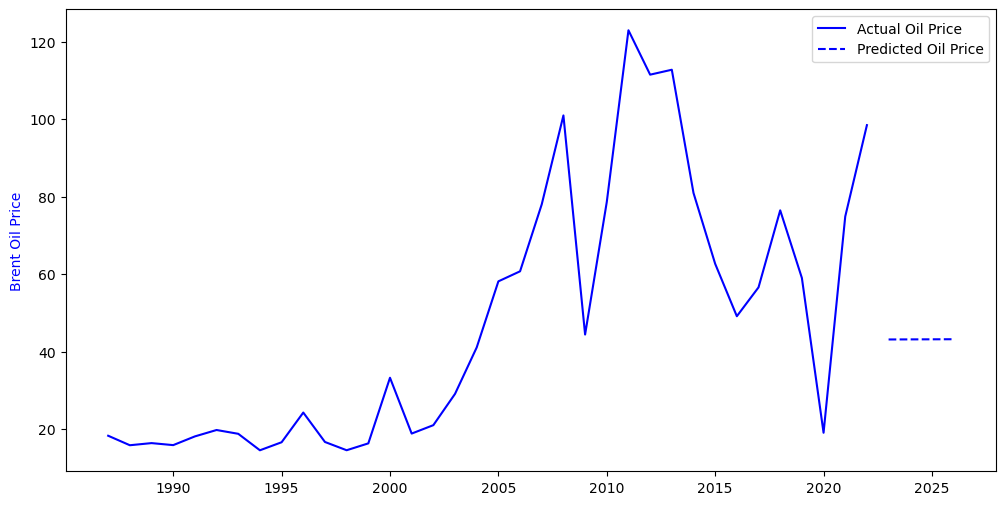

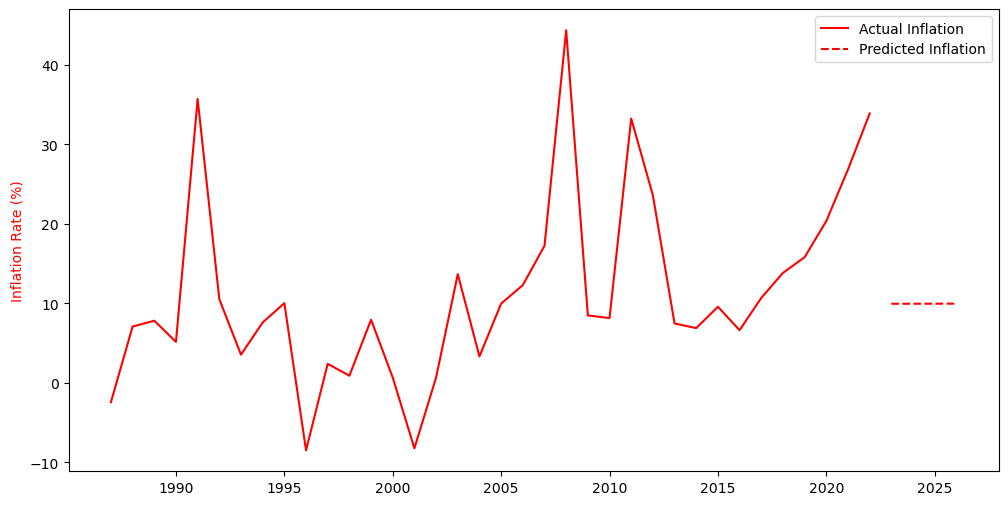

In [24]:
analysis.forecast_future()

In [30]:
aligned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 21 to 56
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        36 non-null     float64
 1   Year         36 non-null     int32  
 2   Inflation_%  36 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1008.0 bytes


In [31]:
aligned_data.to_csv('../week 10 data/Data/alligned_price_and_inflation_eth.csv')